# Surf's Up:  Climate Analysis
Comment

In [1]:
from sqlalchemy import *
from sqlalchemy.orm import create_session
from sqlalchemy.ext.declarative import declarative_base
from datetime import datetime
from sqlalchemy.orm import contains_eager, joinedload
from sqlalchemy.orm import relationship

#Create and engine and get the metadata
Base = declarative_base()
engine = create_engine('sqlite:///hawaii.sqlite', echo=True)
metadata = MetaData(bind=engine)

#Reflect each database table we need to use, using metadata
class Stations(Base):
    __table__ = Table('stations', metadata, autoload=True)
    
class Measurements(Base):
    __table__ = Table('measurements', metadata, autoload=True)
    
session = create_session(bind=engine)

2018-01-20 21:28:19,943 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2018-01-20 21:28:19,945 INFO sqlalchemy.engine.base.Engine ()
2018-01-20 21:28:19,948 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2018-01-20 21:28:19,950 INFO sqlalchemy.engine.base.Engine ()
2018-01-20 21:28:19,953 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("stations")
2018-01-20 21:28:19,955 INFO sqlalchemy.engine.base.Engine ()
2018-01-20 21:28:19,960 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'stations' AND type = 'table'
2018-01-20 21:28:19,962 INFO sqlalchemy.engine.base.Engine ()
2018-01-20 21:28:19,966 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("stations")
2018-01-20 21:28:19,968 INFO sqlalchemy.engine.base.Engine ()
2018-01-20 21:28:19,970 INFO sqlalchemy.engine.base.Engine SELECT sql FROM

In [54]:
# Import required libraries
import pandas as pd

# Query the most recent 12 measurements
qMeasurements = session.query(Measurements.date, Measurements.prcp)
qOrderedMeasures=qMeasurements.order_by(desc(Measurements.date))
qLast12MonthMeasures=qOrderedMeasures.filter(Measurements.date >= '2016-08-23')

# Load query result into dataframe
dfLast12MonthMeasures = pd.read_sql(qLast12MonthMeasures.statement, qLast12MonthMeasures.session.bind, index_col='date')
dfLast12MonthMeasures

2018-01-21 10:13:03,957 INFO sqlalchemy.engine.base.Engine SELECT measurements.date, measurements.prcp 
FROM measurements 
WHERE measurements.date >= ? ORDER BY measurements.date DESC
2018-01-21 10:13:03,959 INFO sqlalchemy.engine.base.Engine ('2016-08-23',)


,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00
2017-08-22,0.00
2017-08-22,0.50
2017-08-21,0.00
2017-08-21,0.02


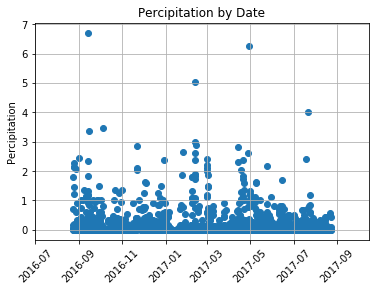

In [3]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
plt.ylabel('Percipitation')
plt.title('Percipitation by Date')
plt.scatter(dfLast12MonthMeasures.index, dfLast12MonthMeasures['prcp'])
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [4]:
# Print summary statistics
print('Summary Statistics')
print('Mean Precipitation: ',dfLast12MonthMeasures['prcp'].mean())
print('Max Precipitation: ',dfLast12MonthMeasures['prcp'].max())
print('Min Precipitation: ',dfLast12MonthMeasures['prcp'].min())
print('Standard Deviation Precipitation: ',dfLast12MonthMeasures['prcp'].std())

Summary Statistics
Mean Precipitation:  0.17727857496288904
Max Precipitation:  6.7
Min Precipitation:  0.0
Standard Deviation Precipitation:  0.4611895038877026


In [5]:
# Query the count of stations
qStationCount = session.query(Stations.station).count()

2018-01-20 21:28:23,010 INFO sqlalchemy.engine.base.Engine SELECT count(*) AS count_1 
FROM (SELECT stations.station AS stations_station 
FROM stations) AS anon_1
2018-01-20 21:28:23,013 INFO sqlalchemy.engine.base.Engine ()


In [6]:
print(qStationCount)

9


In [7]:
# Count the observations by station order in descending order of observation count
from sqlalchemy import func
qObservationCountByStation = session.query(Measurements.station, func.count(Measurements.station)).group_by(Measurements.station).order_by(desc(func.count(Measurements.station))).all()
print('-------')
print('Stations in descending order of observations:')
print(qObservationCountByStation)
print('-------')
print('')

# Print the station with highest observation count
print('Station with the highest observation count')
print('-------')
print(qObservationCountByStation[0])

2018-01-20 21:28:23,045 INFO sqlalchemy.engine.base.Engine SELECT measurements.station AS measurements_station, count(measurements.station) AS count_1 
FROM measurements GROUP BY measurements.station ORDER BY count(measurements.station) DESC
2018-01-20 21:28:23,047 INFO sqlalchemy.engine.base.Engine ()
-------
Stations in descending order of observations:
[('USC00519281', 2772), ('USC00513117', 2696), ('USC00519397', 2685), ('USC00519523', 2572), ('USC00516128', 2484), ('USC00514830', 1937), ('USC00511918', 1932), ('USC00517948', 683), ('USC00518838', 342)]
-------

Station with the highest observation count
-------
('USC00519281', 2772)


In [8]:
# Query the most recent 12 measurements
qTobsMeasurements = session.query(Measurements.station, Measurements.date, Measurements.tobs)
qOrderedTobsMeasures=qTobsMeasurements.order_by(desc(Measurements.date))
qLast12MonthTobsMeasures=qOrderedTobsMeasures.filter(Measurements.date >= '2016-08-23')
qFilterHighestTobsObservations=qLast12MonthTobsMeasures.filter_by(station=qObservationCountByStation[0].station)

# Load query result into dataframe
dfTobs = pd.read_sql(qFilterHighestTobsObservations.statement, qFilterHighestTobsObservations.session.bind)
dfTobs.head()

2018-01-20 21:28:23,082 INFO sqlalchemy.engine.base.Engine SELECT measurements.station, measurements.date, measurements.tobs 
FROM measurements 
WHERE measurements.date >= ? AND measurements.station = ? ORDER BY measurements.date DESC
2018-01-20 21:28:23,083 INFO sqlalchemy.engine.base.Engine ('2016-08-23', 'USC00519281')


,station,date,tobs
0,USC00519281,2017-08-18,79
1,USC00519281,2017-08-17,76
2,USC00519281,2017-08-16,76
3,USC00519281,2017-08-15,77
4,USC00519281,2017-08-14,77


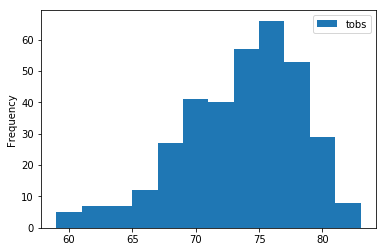

In [16]:
dfTobsPlotData=dfTobs.drop('station', axis=1)
dfTobsPlotData.plot.hist(bins=12)
plt.show()

In [34]:
# Function to return avg temp for data range

def calc_temps(startDate, endDate):
    # Query the most daternge
    qTobsAvg = session.query(func.avg(Measurements.tobs)).filter(and_(Measurements.date >= startDate, Measurements.date <= endDate))
    meanTemp = qTobsAvg[0][0]
    qTobsMin = session.query(func.min(Measurements.tobs)).filter(and_(Measurements.date >= startDate, Measurements.date <= endDate))
    minTemp = qTobsMin[0][0]
    qTobsMax = session.query(func.max(Measurements.tobs)).filter(and_(Measurements.date >= startDate, Measurements.date <= endDate))
    maxTemp = qTobsMax[0][0]
    return(meanTemp, minTemp, maxTemp)

In [36]:
results=calc_temps('2016-08-01', '2017-08-01')
print('Avg, Min, Max')
print(results)

2018-01-20 22:21:33,260 INFO sqlalchemy.engine.base.Engine SELECT avg(measurements.tobs) AS avg_1 
FROM measurements 
WHERE measurements.date >= ? AND measurements.date <= ?
 LIMIT ? OFFSET ?
2018-01-20 22:21:33,262 INFO sqlalchemy.engine.base.Engine ('2016-08-01', '2017-08-01', 1, 0)
2018-01-20 22:21:33,272 INFO sqlalchemy.engine.base.Engine SELECT min(measurements.tobs) AS min_1 
FROM measurements 
WHERE measurements.date >= ? AND measurements.date <= ?
 LIMIT ? OFFSET ?
2018-01-20 22:21:33,273 INFO sqlalchemy.engine.base.Engine ('2016-08-01', '2017-08-01', 1, 0)
2018-01-20 22:21:33,282 INFO sqlalchemy.engine.base.Engine SELECT max(measurements.tobs) AS max_1 
FROM measurements 
WHERE measurements.date >= ? AND measurements.date <= ?
 LIMIT ? OFFSET ?
2018-01-20 22:21:33,283 INFO sqlalchemy.engine.base.Engine ('2016-08-01', '2017-08-01', 1, 0)
Avg, Min, Max
(74.54879227053141, 58, 87)


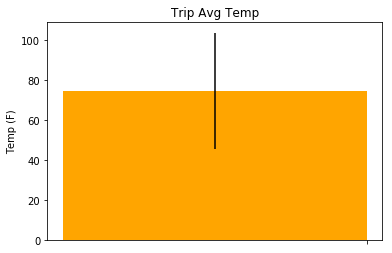

In [51]:
# Plot temps
import numpy as np
import matplotlib.pyplot as plt

width = .5      # the width of the bars

y_err=results[2] - results[1]
fig, ax = plt.subplots()
rects1 = ax.bar(0, results[0], width, color='orange', yerr=y_err)

# add some text for labels, title and axes ticks
ax.set_ylabel('Temp (F)')
ax.set_title('Trip Avg Temp')
ind = np.arange(1)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels((''))

plt.show()